In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [3]:
#Lectura
data = pd.read_csv("customer_shopping_limpio.csv")

In [4]:
print(data.shape)
data.head(50)

(98553, 8)


,gender,age,category,quantity,price,payment_method,month,gasto_total
0,Female,28,Clothing,5,39.01040,Credit Card,8,195.05200
1,Male,21,Shoes,3,46.81326,Debit Card,12,140.43978
2,Male,20,Clothing,1,7.80208,Cash,11,7.80208
3,Female,66,Shoes,5,78.02210,Credit Card,5,390.11050
4,Female,53,Books,4,1.57560,Cash,10,6.30240
5,Female,28,Clothing,5,39.01040,Credit Card,5,195.05200
6,Female,49,Cosmetics,1,1.05716,Cash,3,1.05716
7,Female,32,Clothing,2,15.60416,Credit Card,1,31.20832
8,Male,69,Clothing,3,23.40624,Credit Card,11,70.21872
9,Female,60,Clothing,2,15.60416,Credit Card,8,31.20832


In [5]:
# Label Encoding solo para 'gender'
le = LabelEncoder()
data['gender'] = le.fit_transform(data['gender']) 

# Definir las columnas categóricas
columnas_categoricas = ['payment_method', 'month']

# Aplicar One-Hot Encoding
encoder = OneHotEncoder(sparse_output=False, drop="first")  # Elimina la primera categoría para evitar multicolinealidad
X = encoder.fit_transform(data[columnas_categoricas])

# Convertir a DataFrame
encoded_df = pd.DataFrame(X, columns=encoder.get_feature_names_out(columnas_categoricas))

# Concatenar con las demás variables numéricas
X_preparado = pd.concat([data.drop(columns=columnas_categoricas + ["category"]), encoded_df], axis=1)

# Aplicar  LabelEncoder a la variable objetivo
category_encoder = LabelEncoder()
Y = category_encoder.fit_transform(data["category"])
print(X_preparado.shape)
print(Y.shape)

(98553, 18)
(98553,)


In [6]:
#Visualizamos el orden de las columnas que luego nos va servir para hacer una clasificación con un dato que insertemos
#Y visualizamos la salida que dentra la clasificación
X_array = X_preparado.values
print(X_preparado.columns.tolist())
print(Y)
#Comprobamos que nos ha devuelto un array numpy para al hacer la codificación onehot para ya poder trabajar con los datos en el modelo
print(type(X_array))
print(type(Y))
# Muestra las etiquetas codificadas
print(f"Etiquetas codificadas: {Y[:20]}")

# Mapeo entre las clases originales y los números
print(f"Categorías originales: {category_encoder.classes_}")

['gender', 'age', 'quantity', 'price', 'gasto_total', 'payment_method_Credit Card', 'payment_method_Debit Card', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12']
[1 4 1 ... 3 6 5]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
Etiquetas codificadas: [1 4 1 4 0 1 2 1 1 1 3 0 7 1 1 4 0 3 1 7]
Categorías originales: ['Books' 'Clothing' 'Cosmetics' 'Food & Beverage' 'Shoes' 'Souvenir'
 'Technology' 'Toys']


In [7]:
from sklearn.model_selection import train_test_split

x_tr, x_resto, y_tr, y_resto = train_test_split(X_array, Y, test_size=0.2, random_state=23)

x_vl, x_test, y_vl, y_test = train_test_split(x_resto, y_resto, test_size=0.5, random_state=23) 

print(x_tr.shape,y_tr.shape)
print(x_vl.shape, y_vl.shape)
print(x_test.shape,y_test.shape)

(78842, 18) (78842,)
(9855, 18) (9855,)
(9856, 18) (9856,)


In [9]:
from sklearn.preprocessing import StandardScaler

#StandardScaler
x_scaler = StandardScaler()

#Fit_transform para cálcular máximos y minimos y escalar el set de entrenamiento
x_tr_s = x_scaler.fit_transform(x_tr)

#Algunas características del escalador
print("Media:", x_scaler.mean_)
print("Desviación estándar:", x_scaler.scale_)

#Resultado
print('Resultado del escalamiento sobre "x_tr":')
print(f' Mínimos: {x_tr_s.min(axis=0)}')
print(f' Máximos: {x_tr_s.max(axis=0)}')

#Ahora escalamos los set de validacion y prueba pero con transform porque usa de referencia los valores escalados del set de entrenamiento
x_vl_s = x_scaler.transform(x_vl)
x_ts_s = x_scaler.transform(x_test)

print('Set de validacion:')
print(f'{x_vl_s.min(axis=0)},{x_vl_s.max(axis=0)}')
print('Set de prueba')
print(f'{x_ts_s.min(axis=0)},{x_ts_s.max(axis=0)}')
print(x_tr_s.shape[1])

Media: [ 0.40271683 43.40416276  3.00343725 17.93318784 65.74149895  0.35042236
  0.20302631  0.10485528  0.0874407   0.07527714  0.07693869  0.07671038
  0.07945004  0.07710357  0.07386926  0.07752213  0.07560691  0.07674843]
Desviación estándar: [  0.49044468  15.00959433   1.41407933  24.54001277 110.03515118
   0.47710222   0.40225194   0.30636686   0.28247978   0.263838
   0.26649414   0.26613136   0.27043988   0.26675572   0.26155801
   0.26741812   0.26436812   0.26619187]
Resultado del escalamiento sobre "x_tr":
 Mínimos: [-0.82112589 -1.69252827 -1.41677854 -0.72523222 -0.59622328 -0.73448068
 -0.50472424 -0.34225399 -0.30954677 -0.28531575 -0.28870687 -0.28824256
 -0.29378078 -0.28904188 -0.28242017 -0.2898911  -0.28599102 -0.28831998]
 Máximos: [1.21784005 1.7052984  1.41191707 4.83157092 5.60510432 1.3615062
 1.98127992 2.92180666 3.23052959 3.50488887 3.46372088 3.46930036
 3.40389867 3.45970625 3.54082354 3.44957126 3.49661326 3.46836876]
Set de validacion:
[-0.82112589 -

In [10]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_tr), y=y_tr)

# Convertir los pesos a un diccionario
class_weight_dict = dict(zip(np.unique(y_tr), class_weights))
print(class_weight_dict)

{0: 2.4811807653575024, 1: 0.36255196262369865, 2: 0.8220243556593544, 3: 0.8408916382252559, 4: 1.2315983504123968, 5: 2.5192356850715747, 6: 2.4552192326856006, 7: 1.224254658385093}


In [11]:
import tensorflow as tf
import keras 

model = keras.Sequential([
    keras.layers.Dense(units=128, activation='relu', kernel_initializer="he_uniform", input_dim=x_tr_s.shape[1]),
    keras.layers.Dropout(0.3),  # Agregar dropout para evitar sobreajuste
    keras.layers.Dense(units=64, activation='relu', kernel_initializer="he_uniform"),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(units=32, activation='relu', kernel_initializer="he_uniform"),
    keras.layers.Dense(units=8, activation='softmax')  # 8 categorías
])

# Compilar el modelo con una tasa de aprendizaje más baja
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',#Espera clases como enteros, ya que hemos usado labelEncoding para el target
              metrics=['accuracy'])

# Entrenar el modelo
model.fit(x_tr_s, y_tr, validation_data=(x_vl_s, y_vl), epochs=100, batch_size=64, class_weight=class_weight_dict)

C:\Users\carli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
1232/1232 ━━━━━━━━━━━━━━━━━━━━ 3s 973us/step - accuracy: 0.2872 - loss: 1.7769 - val_accuracy: 0.5583 - val_loss: 0.8854
Epoch 2/100
1232/1232 ━━━━━━━━━━━━━━━━━━━━ 1s 878us/step - accuracy: 0.5697 - loss: 1.1220 - val_accuracy: 0.6197 - val_loss: 0.7917
Epoch 3/100
1232/1232 ━━━━━━━━━━━━━━━━━━━━ 1s 884us/step - accuracy: 0.6293 - loss: 1.0152 - val_accuracy: 0.7123 - val_loss: 0.6765
Epoch 4/100
1232/1232 ━━━━━━━━━━━━━━━━━━━━ 1s 895us/step - accuracy: 0.6881 - loss: 0.8808 - val_accuracy: 0.7863 - val_loss: 0.4937
Epoch 5/100
1232/1232 ━━━━━━━━━━━━━━━━━━━━ 1s 878us/step - accuracy: 0.7486 - loss: 0.6698 - val_accuracy: 0.8581 - val_loss: 0.3564
Epoch 6/100
1232/1232 ━━━━━━━━━━━━━━━━━━━━ 1s 897us/step - accuracy: 0.7941 - loss: 0.5384 - val_accuracy: 0.8565 - val_loss: 0.3171
Epoch 7/100
1232/1232 ━━━━━━━━━━━━━━━━━━━━ 1s 938us/step - accuracy: 0.8133 - loss: 0.4744 - val_accuracy: 0.9048 - val_loss: 0.2598
Epoch 8/100
1232/1232 ━━━━━━━━━━━━━━━━━━━━ 1s 888us/step - accuracy: 

308/308 ━━━━━━━━━━━━━━━━━━━━ 0s 716us/step - accuracy: 0.9552 - loss: 0.0954
Test Accuracy: 0.9544
308/308 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step


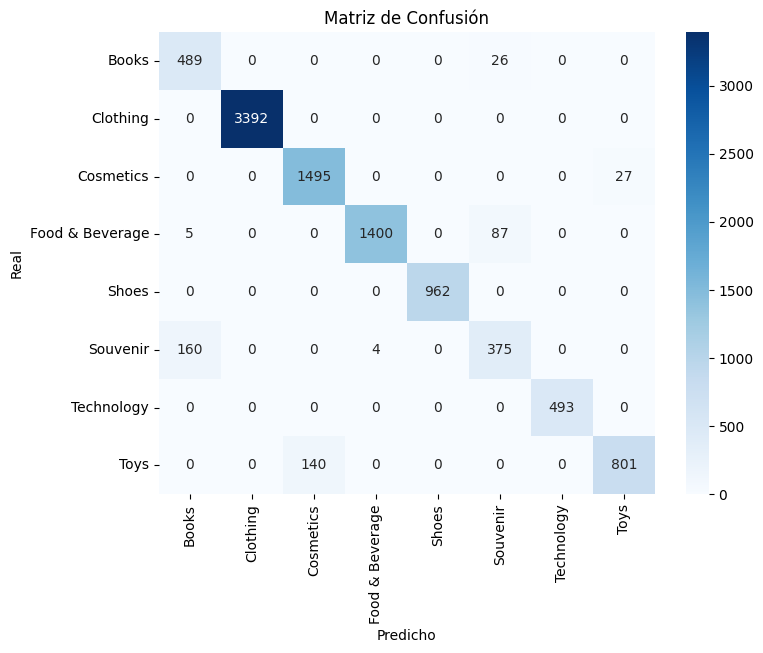

In [17]:
loss, acc = model.evaluate(x_ts_s, y_test)
print(f"Test Accuracy: {acc:.4f}")

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(x_ts_s).argmax(axis=1)  # Convertir probabilidades a etiquetas
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=category_encoder.classes_, yticklabels=category_encoder.classes_)
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()

In [ ]:
#Categorías originales: ['Books' 'Clothing' 'Cosmetics' 'Food & Beverage' 'Shoes' 'Souvenir'
#'Technology' 'Toys']
predicciones = model.predict(x_ts_s)
np.set_printoptions(suppress=True, precision=4)
print(predicciones[:25])

308/308 ━━━━━━━━━━━━━━━━━━━━ 0s 571us/step
[[0.     1.     0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.9791 0.     0.     0.     0.     0.0209]
 [0.     0.9995 0.     0.     0.0005 0.     0.     0.    ]
 [0.     1.     0.     0.     0.     0.     0.     0.    ]
 [0.     1.     0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.     0.    ]
 [0.0176 0.     0.     0.0012 0.     0.9812 0.     0.    ]
 [0.     1.     0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.9974 0.     0.     0.     0.     0.0025]
 [0.0001 0.     0.0003 0.     0.     0.     0.     0.9996]
 [0.0001 0.     0.0005 0.     0.     0.     0.     0.9995]
 [0.     1.     0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.     1.     0.    ]
 [0.0001 0.0001 0.735  0.     0.     0.     0.     0.2648]
 [0.     0.9999 0.     0.     0.0001 0.     0.     0.    ]
 [0.     0.9999 0.     0.     0.0001 0.     0.     0.    ]
 [0.0001 0.  

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score
#Defino el algoritmo de árbol de decisión
algoritmo = DecisionTreeClassifier(criterion = 'entropy', max_depth=6,random_state=42)
#Entreno el modelo con los datos de entrenamiento
algoritmo.fit(x_tr_s, y_tr)

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=42)

Predicciones: [1 2 1 1 1 3 5 1 2 7 2 1 6 2 1 1 7 6 3 2]


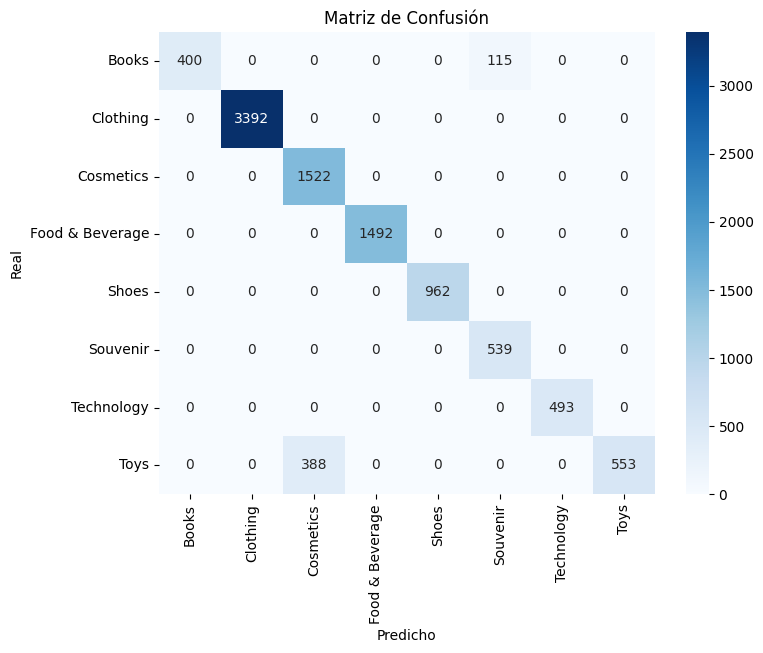

Precision: 0.9590138555910882


In [18]:
#Realizo una predicción con los datos de prueba
y_pred = algoritmo.predict(x_ts_s)
np.set_printoptions(suppress=True, precision=4)
print('Predicciones:', y_pred[:20])

#Verifico la matriz de confusión
matriz = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(matriz, annot=True, fmt='d', cmap='Blues', xticklabels=category_encoder.classes_, yticklabels=category_encoder.classes_)
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()

#Calculamos la precisión del modelo, pero ponderada
precision = precision_score(y_test, y_pred, average="weighted")
print('Precision:', precision)

#Categorías originales: ['Books' 'Clothing' 'Cosmetics' 'Food & Beverage' 'Shoes' 'Souvenir' 'Technology' 'Toys']


In [15]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=42)
rf.fit(x_tr_s, y_tr)
#Realizo una predicción con los datos de prueba
y_pred_rf = rf.predict(x_ts_s)
np.set_printoptions(suppress=True, precision=4)
print('Predicciones:', y_pred_rf[:20])

#Verifico la matriz de confusión
matriz = confusion_matrix(y_test, y_pred_rf)
print('Matriz de confusión:', matriz)

#Calculamos la precisión del modelo, pero ponderada
precision = precision_score(y_test, y_pred_rf, average="weighted")
print('Precision:', precision)

##Categorías originales: ['Books' 'Clothing' 'Cosmetics' 'Food & Beverage' 'Shoes' 'Souvenir' 'Technology' 'Toys']

Predicciones: [1 2 1 1 1 3 5 1 2 2 2 1 4 2 1 1 2 6 3 2]
Matriz de confusión: [[ 508    0    0    7    0    0    0    0]
 [   0 3392    0    0    0    0    0    0]
 [   0    0 1522    0    0    0    0    0]
 [   0    0    0 1492    0    0    0    0]
 [   0    0    0    0  962    0    0    0]
 [   0    0    0    0    0  539    0    0]
 [   0    1    0    0   53    0  439    0]
 [   0    0  543    0    0    0    0  398]]
Precision: 0.9534886861037535


'gender'(0 female 1 male), 'age', 'quantity', 'price', 'gasto_total', 'payment_method_Credit Card', 'payment_method_Debit Card', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12'

In [16]:
nueva_muestra = np.array([[1, 35, 4, 2, 8, 0, 1, 0, 0, 0, 0, 1, 0,0,0,0,0,0]])
nueva_muestra_s = x_scaler.transform(nueva_muestra)
pred_red_neu = model.predict(nueva_muestra_s)
pred_arbol = algoritmo.predict(nueva_muestra_s)
pred_bosque = rf.predict(nueva_muestra_s)
print(pred_red_neu)
print(pred_arbol)
print(pred_bosque)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
[[0.9995 0.     0.     0.     0.     0.0004 0.     0.    ]]
[0]
[0]
